# Preprocess data

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from sweettvmovie.utils.preprocessing import (encode_categorical,
                                              inverse_encode_categorical,
                                              load_processed_data,
                                              process_data)

use_cached = False  # set to False to run preprocessing, use cached results otherwise

if use_cached:
    views, movies, submission, cat_dict = load_processed_data()
else:
    views, movies, submission, cat_dict = process_data(return_data=True, drop_unknown_movies=True)

2020-11-15 17:50:23,481 | INFO : Working with `submission` file...
2020-11-15 17:50:23,485 | INFO : df shape: (1695, 2)
2020-11-15 17:50:23,486 | INFO : Users found in test: 1695
2020-11-15 17:50:23,486 | INFO : Working with `views` file...
2020-11-15 17:50:23,787 | INFO : df shape: (346408, 8)
2020-11-15 17:50:23,824 | INFO : Users found in train: 2055
2020-11-15 17:50:23,824 | INFO : Test users found in train: 1695/1695
2020-11-15 17:50:23,832 | INFO : episodic movies views share, %: 14.9288
2020-11-15 17:50:23,931 | INFO : Movie db shape: (19265, 15)
2020-11-15 17:50:23,950 | INFO : NaN count:
year             0.000000
title            0.102933
description      0.335323
genres           0.110044
director         0.084402
actors           0.108695
writers          0.470023
music            0.587750
art              0.609136
producer         0.655178
imdb_id          0.210122
tmdb_id          0.278432
imdb_rating      0.254555
tmdb_rating      0.292032
available_now    0.000000
dtype:

In [2]:
views.head()

ts  user_id  movie_id  episode_id  view_month  view_year  \
0 2019-10-01 00:01:31      712     14885       81786          10       2019   
1 2019-10-01 00:01:38       84     16970      104006          10       2019   
2 2019-10-01 00:01:57      222     11155           0          10       2019   
3 2019-10-01 00:02:41     1851     14989           0          10       2019   
4 2019-10-01 00:03:17     1693     11026           0          10       2019   

   view_weekday  view_monthday  
0             1              1  
1             1              1  
2             1              1  
3             1              1  
4             1              1

In [3]:
movies.head()

year                                  title  \
movie_id                                                
1         2008                   The Girl from Monaco   
2         2008                  Every Jack has a Jill   
3         2009                            Dorian Gray   
4         2008  How to Lose Friends & Alienate People   
5         2009                               Cell 211   

                                                                                                                                                                                                      description  \
movie_id                                                                                                                                                                                                            
1         A brilliant and neurotic attorney goes to Monaco to defend a famous criminal. But, instead of focusing on the case, he falls for a beautiful she-devil, who turns him into a complete wreck... Hopef...   
2         Jack is encouraged to take the romantic Paris vacation he won, despite just being dumped by his girlfriend. His trip soon devolves into chaos and adventure, when his luggage is swapped for a Frenc...   
3         A vain London playboy offers his soul in exchange for eternal beauty in this adaptation of the chilling tale by author Oscar Wilde. Seduced into the decadent world of Lord Henry Wotton (Colin Firt...   
4                                                          A British writer struggles to fit in at a high-profile magazine in New York. Based on Toby Young's memoir "How to Lose Friends &amp; Alienate People".   
5         The story of two men on different sides of a prison riot -- the inmate leading the rebellion and the young guard trapped in the revolt, who poses as a prisoner in a desperate attempt to survive th...   

            genres director  \
movie_id                      
1          [7, 11]    [719]   
2          [7, 17]   [3208]   
3         [25, 22]   [5132]   
4          [7, 11]   [5718]   
5          [1, 25]   [1543]   

                                                                                    actors  \
movie_id                                                                                     
1                     [11757, 14194, 16667, 28869, 1697, 13231, 33601, 30858, 7334, 21429]   
2                     [18550, 5496, 23602, 23931, 36135, 13808, 38825, 9772, 17046, 15888]   
3         [7683, 25979, 6534, 17524, 29000, 12024, 29685, 5199, 5298, 16702, 10947, 29288]   
4                     [32825, 16682, 8365, 17105, 19596, 23880, 19121, 16338, 19145, 7230]   
5                [21630, 36469, 11972, 21631, 23211, 6448, 22250, 4226, 22225, 11919, 673]   

            imdb_id  tmdb_id  imdb_rating  tmdb_rating  available_now  
movie_id                                                               
1         tt1139800  15342.0          5.8          4.8           True  
2         tt1094668  32338.0          6.1          5.4           True  
3         tt1235124  23488.0          6.3          5.9           True  
4         tt0455538  13092.0          6.4          6.1           True  
5         tt1242422  33273.0          7.6          7.4           True

In [4]:
submission.head()

user_id   movie_id
0     1870  0 0 0 0 0
1     1107  0 0 0 0 0
2       32  0 0 0 0 0
3     1820  0 0 0 0 0
4     1368  0 0 0 0 0

In [5]:
# encode back to normal (example, returns a copy, do not modify in-place)
inverse_encode_categorical(df=submission, cat_dict=cat_dict, ignore_columns=['movie_id'])

user_id   movie_id
0     16975709365084587137  0 0 0 0 0
1     10225505309438393880  0 0 0 0 0
2       337894458057354820  0 0 0 0 0
3     16389753737490268206  0 0 0 0 0
4     12377183607123393787  0 0 0 0 0
...                    ...        ...
1690  16073255054457636768  0 0 0 0 0
1691  18217982949448186449  0 0 0 0 0
1692   8493046014808115881  0 0 0 0 0
1693   6524731807859816855  0 0 0 0 0
1694  17611799088817908833  0 0 0 0 0

[1695 rows x 2 columns]

In [6]:
# encode back to normal (example, returns a copy, do not modify in-place)
inverse_encode_categorical(df=views, cat_dict=cat_dict).head()

ts               user_id movie_id  episode_id  view_month  \
0 2019-10-01 00:01:31   6582736606368231689    15391       81786          10   
1 2019-10-01 00:01:38    750594023898082561    17539      104006          10   
2 2019-10-01 00:01:57   2110694416164715906    11324           0          10   
3 2019-10-01 00:02:41  16763157513451692176    15498           0          10   
4 2019-10-01 00:03:17  15301363348200942035    11195           0          10   

   view_year  view_weekday  view_monthday  
0       2019             1              1  
1       2019             1              1  
2       2019             1              1  
3       2019             1              1  
4       2019             1              1

In [7]:
# orig df is not modified
views.head()

ts  user_id  movie_id  episode_id  view_month  view_year  \
0 2019-10-01 00:01:31      712     14885       81786          10       2019   
1 2019-10-01 00:01:38       84     16970      104006          10       2019   
2 2019-10-01 00:01:57      222     11155           0          10       2019   
3 2019-10-01 00:02:41     1851     14989           0          10       2019   
4 2019-10-01 00:03:17     1693     11026           0          10       2019   

   view_weekday  view_monthday  
0             1              1  
1             1              1  
2             1              1  
3             1              1  
4             1              1

# Feature Engineering (TODO)

## User-based

In [9]:
from sweettvmovie.utils.fe import make_user_features

# example usage
start_date = None
end_date = views.ts.max() - np.timedelta64(1, 'M')

user_features = make_user_features(
    df_views=views,
    df_movies=movies,
    cat_dict=cat_dict,
    start_date=start_date,
    end_date=end_date,
)
user_features.describe()

total_view_cnt_log  view_cnt_monthly_avg_log  uniqueness_ratio  \
count         2055.000000               2055.000000       2055.000000   
mean             4.737843                  2.794274          0.775414   
std              0.811312                  0.618584          0.220121   
min              1.098612                  0.693147          0.060150   
25%              4.241301                  2.363210          0.613270   
50%              4.804021                  2.788093          0.833333   
75%              5.298317                  3.207092          0.978723   
max              7.292337                  5.100544          1.000000   

       unique_movies_watched_log  time_between_views_days_avg  serial_share  \
count                2055.000000                  2055.000000   2055.000000   
mean                    4.432454                     2.711683      0.287530   
std                     0.740595                     2.645192      0.247300   
min                     1.098612                     0.116133      0.000000   
25%                     3.979638                     1.236738      0.063225   
50%                     4.499810                     1.966945      0.230769   
75%                     4.930864                     3.259320      0.473112   
max                     6.904751                    44.627308      1.000000   

       user_film_rating_avg  user_film_rating_std  user_film_year_avg  \
count           2055.000000           2055.000000         2055.000000   
mean               6.535478              1.072724         2013.021691   
std                0.419414              0.243287            2.110585   
min                4.259910              0.138675         1992.419753   
25%                6.255222              0.907561         2012.000000   
50%                6.475927              1.046350         2013.328982   
75%                6.755662              1.196771         2014.424193   
max                8.196879              2.230143         2017.906250   

       prev_month_intersection_share_mean  ...  user_genre_share__15  \
count                         2055.000000  ...           2055.000000   
mean                             0.010927  ...              0.029256   
std                              0.026316  ...              0.032707   
min                              0.000000  ...              0.000000   
25%                              0.000000  ...              0.008043   
50%                              0.000000  ...              0.019531   
75%                              0.011375  ...              0.037482   
max                              0.328571  ...              0.264706   

       user_genre_share__16  user_genre_share__17  user_genre_share__19  \
count           2055.000000           2055.000000           2055.000000   
mean               0.108818              0.053207              0.001328   
std                0.163982              0.047151              0.003274   
min                0.000000              0.000000              0.000000   
25%                0.009486              0.022408              0.000000   
50%                0.039007              0.042353              0.000000   
75%                0.131415              0.068751              0.001519   
max                1.000000              0.561905              0.052632   

       user_genre_share__20  user_genre_share__21  user_genre_share__22  \
count           2055.000000           2055.000000           2055.000000   
mean               0.007319              0.000971              0.066937   
std                0.022117              0.004588              0.041203   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.036585   
50%                0.000000              0.000000              0.060201   
75%                0.004908              0.000000              0.090909   
max                0.380000              0.121212     

## Movie-based

### Basic movie features

In [11]:
from sweettvmovie.utils.fe import make_movie_features

# example usage
start_date = None
end_date = views.ts.max() - np.timedelta64(1, 'M')

movie_features = make_movie_features(
    df_views=views,
    df_movies=movies,
    cat_dict=cat_dict,
    start_date=start_date,
    end_date=end_date,
)

movie_features.describe()

unique_users_watches_log  unique_users_watches_last_2_month_log  \
count              19265.000000                           19265.000000   
mean                   0.681357                               0.260393   
std                    1.429828                               0.792893   
min                    0.000000                               0.000000   
25%                    0.000000                               0.000000   
50%                    0.000000                               0.000000   
75%                    0.000000                               0.000000   
max                    6.947937                               5.655992   

       movie_rating_mean          year    is_serial  has_known_actors_share  \
count       19265.000000  19265.000000  4353.000000            19265.000000   
mean            5.931804   2001.251960     0.149552                0.527173   
std             1.625864     18.212935     0.356673                0.347785   
min             0.000000   1918.000000     0.000000                0.000000   
25%             5.700000   1990.000000     0.000000                0.200000   
50%             6.000000   2009.000000     0.000000                0.600000   
75%             6.900000   2015.000000     0.000000                0.800000   
max             9.500000   2022.000000     1.000000                1.000000   

       has_known_director  movie_genre_0  movie_genre_1  movie_genre_2  ...  \
count        19265.000000   19265.000000   19265.000000   19265.000000  ...   
mean             0.432079       0.110044       0.046510       0.043160  ...   
std              0.495378       0.312953       0.145244       0.152886  ...   
min              0.000000       0.000000       0.000000       0.000000  ...   
25%              0.000000       0.000000       0.000000       0.000000  ...   
50%              0.000000       0.000000       0.000000       0.000000  ...   
75%              1.000000       0.000000       0.000000       0.000000  ...   
max              1.000000       1.000000       1.000000       1.000000  ...   

       movie_genre_19  movie_genre_20  movie_genre_21  movie_genre_22  \
count    19265.000000    19265.000000    19265.000000    19265.000000   
mean         0.008372        0.000571        0.000675        0.025912   
std          0.065429        0.023889        0.025969        0.107831   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          0.000000        0.000000        0.000000        0.000000   
max          1.000000        1.000000        1.000000        1.000000   

       movie_genre_23  movie_genre_24  movie_genre_25  movie_genre_26  \
count    19265.000000    19265.000000    19265.000000    19265.000000   
mean         0.016094        0.000156        0.053423        0.001921   
std          0.118849        0.008823        0.151945        0.026557   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          0.000000        0.000000        0.000000        0.000000   
max          1.000000        0.500000        1.000000        0.500000   

       movie_genre_27  movie_genre_28  
count    19265.000000    19265.000000  
mean         0.000424        0.020734  
std          0.011043        0.111587  
min          0.000000        0.000000  
25%          0.000000        0.000000  
50%          0.000000        0.000000  
75%          0.000000        0.000000  
max          0.500000        1.000000  

[8 rows x 36 columns]

### Text embedding

In [9]:
from os import cpu_count

from sweettvmovie.utils.fe import (build_bert_embedder, get_bert_embeddings,
                                   get_use_embedder, get_use_embeddings)

bert_embedder = build_bert_embedder()
max_seq_length = 256
sample_size = 8


# too long as for me (and maybe incorrect usage, please check the code)
bert_pool_embs = get_bert_embeddings(
    texts=movies.iloc[:sample_size].description.fillna(
        '').astype(str).tolist(),
    embedder=bert_embedder,
    max_seq_length=max_seq_length,
)

print(bert_pool_embs.shape)

2020-11-15 11:23:36,295 | INFO : Using /tmp/tfhub_modules to cache modules.
2020-11-15 11:23:36,297 | INFO : Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1'.
2020-11-15 11:23:52,272 | INFO : Downloading https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1: 423.26MB
2020-11-15 11:23:52,273 | INFO : Downloaded https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1, Total size: 423.26MB
2020-11-15 11:23:52,274 | INFO : Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1'.



(8, 768)


In [10]:
# USE embeddings
# we have to wait a little :)
use_embedder = get_use_embedder()

2020-11-15 11:25:40,674 | INFO : Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder-large/5'.
2020-11-15 11:25:56,700 | INFO : Downloading https://tfhub.dev/google/universal-sentence-encoder-large/5: 310.04MB
2020-11-15 11:26:06,495 | INFO : Downloaded https://tfhub.dev/google/universal-sentence-encoder-large/5, Total size: 577.10MB
2020-11-15 11:26:06,496 | INFO : Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder-large/5'.


In [11]:
use_embeddings = get_use_embeddings(
    texts=movies.iloc[:sample_size].description.fillna('').astype(str).tolist(), 
    embedder=use_embedder
)

print(use_embeddings.shape)
use_embeddings.head()

(8, 512)


use_emb__0  use_emb__1  use_emb__2  use_emb__3  use_emb__4  use_emb__5  \
0   -0.063211   -0.004521   -0.053145   -0.011919    0.081514    0.078390   
1    0.011209    0.020734    0.038267    0.027848    0.006262    0.030151   
2    0.010836    0.039598    0.052236   -0.082698    0.065948    0.095929   
3    0.021935    0.038315   -0.015452   -0.010955    0.014141    0.062497   
4    0.004998   -0.032242    0.021938   -0.043101   -0.000908   -0.077761   

   use_emb__6  use_emb__7  use_emb__8  use_emb__9  ...  use_emb__502  \
0    0.005892   -0.018692   -0.061389   -0.016968  ...      0.037352   
1   -0.060241    0.004995   -0.001293    0.003368  ...      0.042758   
2   -0.064389   -0.055991   -0.057475   -0.006778  ...      0.003492   
3   -0.004798    0.053229   -0.002013   -0.025234  ...     -0.051053   
4    0.017317   -0.047877   -0.001504   -0.063864  ...     -0.029993   

   use_emb__503  use_emb__504  use_emb__505  use_emb__506  use_emb__507  \
0     -0.007671      0.056694     -0.000897     -0.007521     -0.001089   
1      0.043977      0.039569     -0.045574      0.030006      0.053534   
2      0.070081     -0.010711     -0.014769     -0.032439     -0.010150   
3      0.056862      0.045137     -0.004129      0.011771      0.040450   
4     -0.014306      0.018303     -0.027652     -0.003495      0.060943   

   use_emb__508  use_emb__509  use_emb__510  use_emb__511  
0     -0.012072     -0.017828     -0.027222     -0.047327  
1     -0.010729     -0.023939     -0.044084     -0.004386  
2     -0.078905      0.045055     -0.008840     -0.006118  
3     -0.048279      0.018121      0.042289     -0.016482  
4     -0.024646      0.012993     -0.034321      0.016729  

[5 rows x 512 columns]

[[1.   0.41 0.24 0.18 0.21 0.11 0.35 0.31]
 [0.41 1.   0.24 0.24 0.22 0.22 0.31 0.35]
 [0.24 0.24 1.   0.31 0.22 0.26 0.32 0.32]
 [0.18 0.24 0.31 1.   0.25 0.24 0.21 0.22]
 [0.21 0.22 0.22 0.25 1.   0.15 0.12 0.45]
 [0.11 0.22 0.26 0.24 0.15 1.   0.22 0.22]
 [0.35 0.31 0.32 0.21 0.12 0.22 1.   0.3 ]
 [0.31 0.35 0.32 0.22 0.45 0.22 0.3  1.  ]]


<AxesSubplot:>

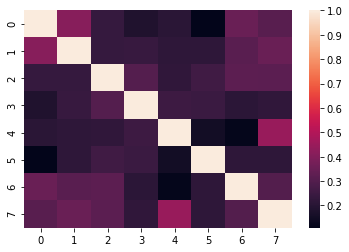

In [12]:
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

cs = cosine_similarity(use_embeddings, use_embeddings)
print(cs.round(2))

sns.heatmap(pd.DataFrame(cs))